importing all the required libreries for the code

In [455]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so
import seaborn as sns
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import math

In [457]:
tesla_data = pd.read_csv("./Data/tesla_data.csv") #Importing the tesla data

In [458]:
tesla_data # reading the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [460]:
tesla_data.shape # printing the number of rows and columns from the data

(2416, 7)

In [461]:
tesla_data.head() # Printing the first five rows of the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [464]:
tesla_data.tail() # printing the last five rows of the data

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [466]:
tesla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [467]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [468]:
tesla_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [470]:
tesla_data['Date'] = pd.to_datetime(tesla_data['Date']) # converting the datatype of 'Date' column  to datetime 

In [471]:
tesla_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [475]:
tesla_data['Month'] = tesla_data['Date'].dt.to_period('M') # converting the date into period of month 

In [476]:
month_mean = tesla_data.groupby('Month',as_index = False).mean()
month_mean.head(3)

,Month,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06,2010-06-29 12:00:00.000000000,22.395001,27.71,20.420000,23.860000,23.860000,1.797670e+07
1,2010-07,2010-07-16 13:42:51.428571392,20.073334,20.64,18.816190,19.558095,19.558095,3.075038e+06
2,2010-08,2010-08-15 22:54:32.727272704,19.545455,19.91,19.080455,19.510909,19.510909,6.835545e+05


In [478]:
month_mean['Month'] = month_mean['Month'].dt.to_timestamp()

In [480]:
month_mean.columns

Index(['Month', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

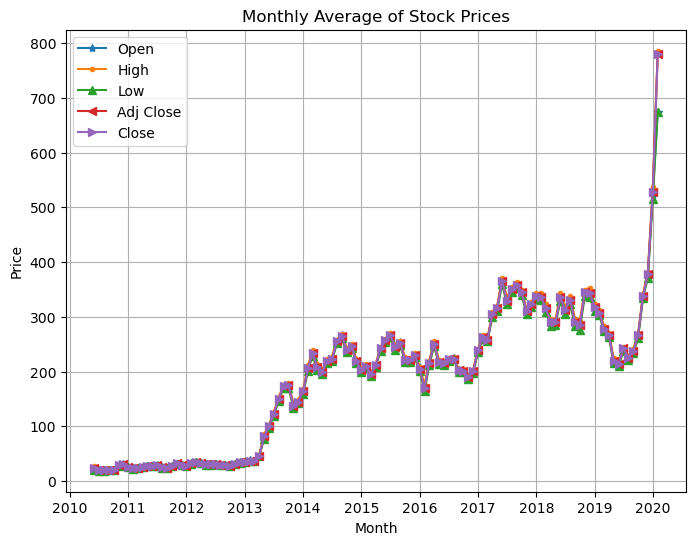

In [481]:
plt.figure(figsize=(8, 6))
plt.plot(month_mean['Month'], month_mean['Open'], label='Open',marker = '*')
plt.plot(month_mean['Month'], month_mean['High'], label='High',marker = '.')
plt.plot(month_mean['Month'], month_mean['Low'], label='Low',marker = '^')
plt.plot(month_mean['Month'], month_mean['Adj Close'], label='Adj Close',marker = '<')
plt.plot(month_mean['Month'], month_mean['Close'], label='Close',marker = '>')
plt.title('Monthly Average of Stock Prices')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Monthly averages of the all the the columns ['Month', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close']. As we can observe that all the values are closely same.

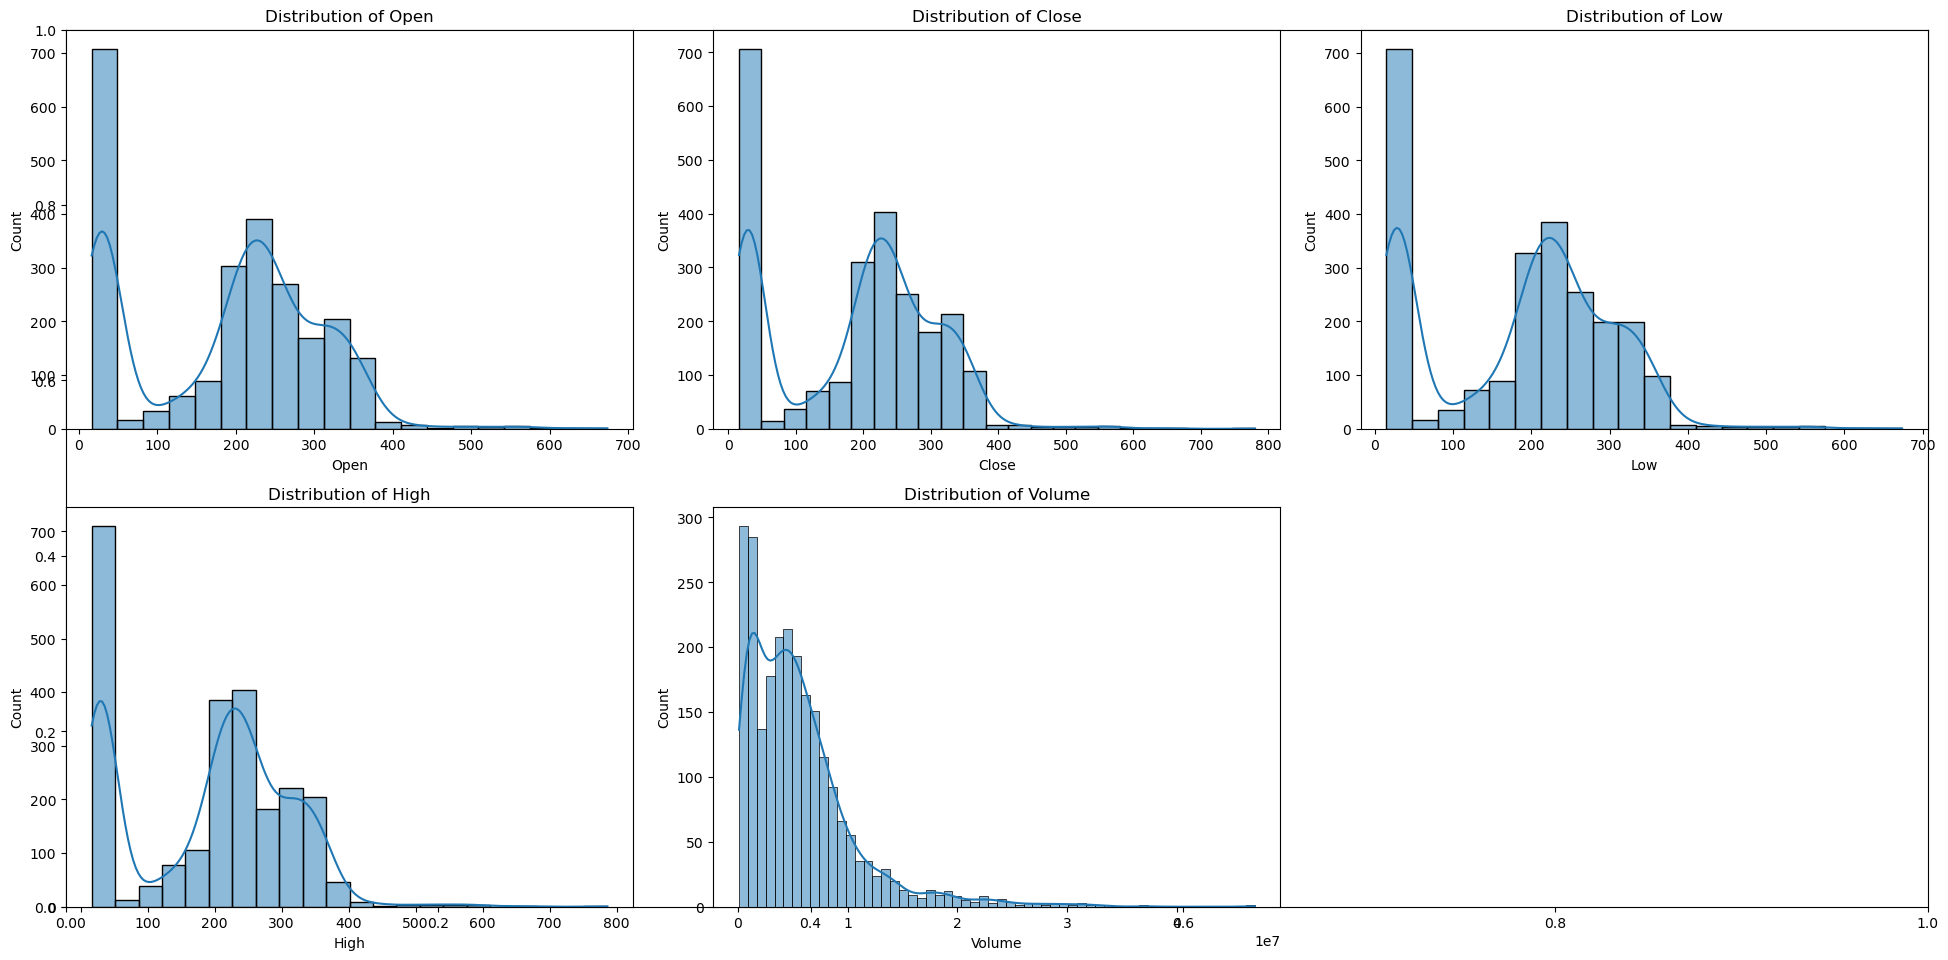

In [483]:
plt.subplots(figsize=(20,10))
feature = ['Open', 'Close', 'Low', 'High', 'Volume']
for i, col in enumerate(feature):
    plt.subplot(2, 3, i+1)
    sns.histplot(tesla_data[col],kde = True)
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

#####
The price distribution (open, close, low, high): Are the prices clustered around a specific range or vary widely?
volume distribution: Is trading volume mostly low with occasional spikes, or is it relatively uniform? 

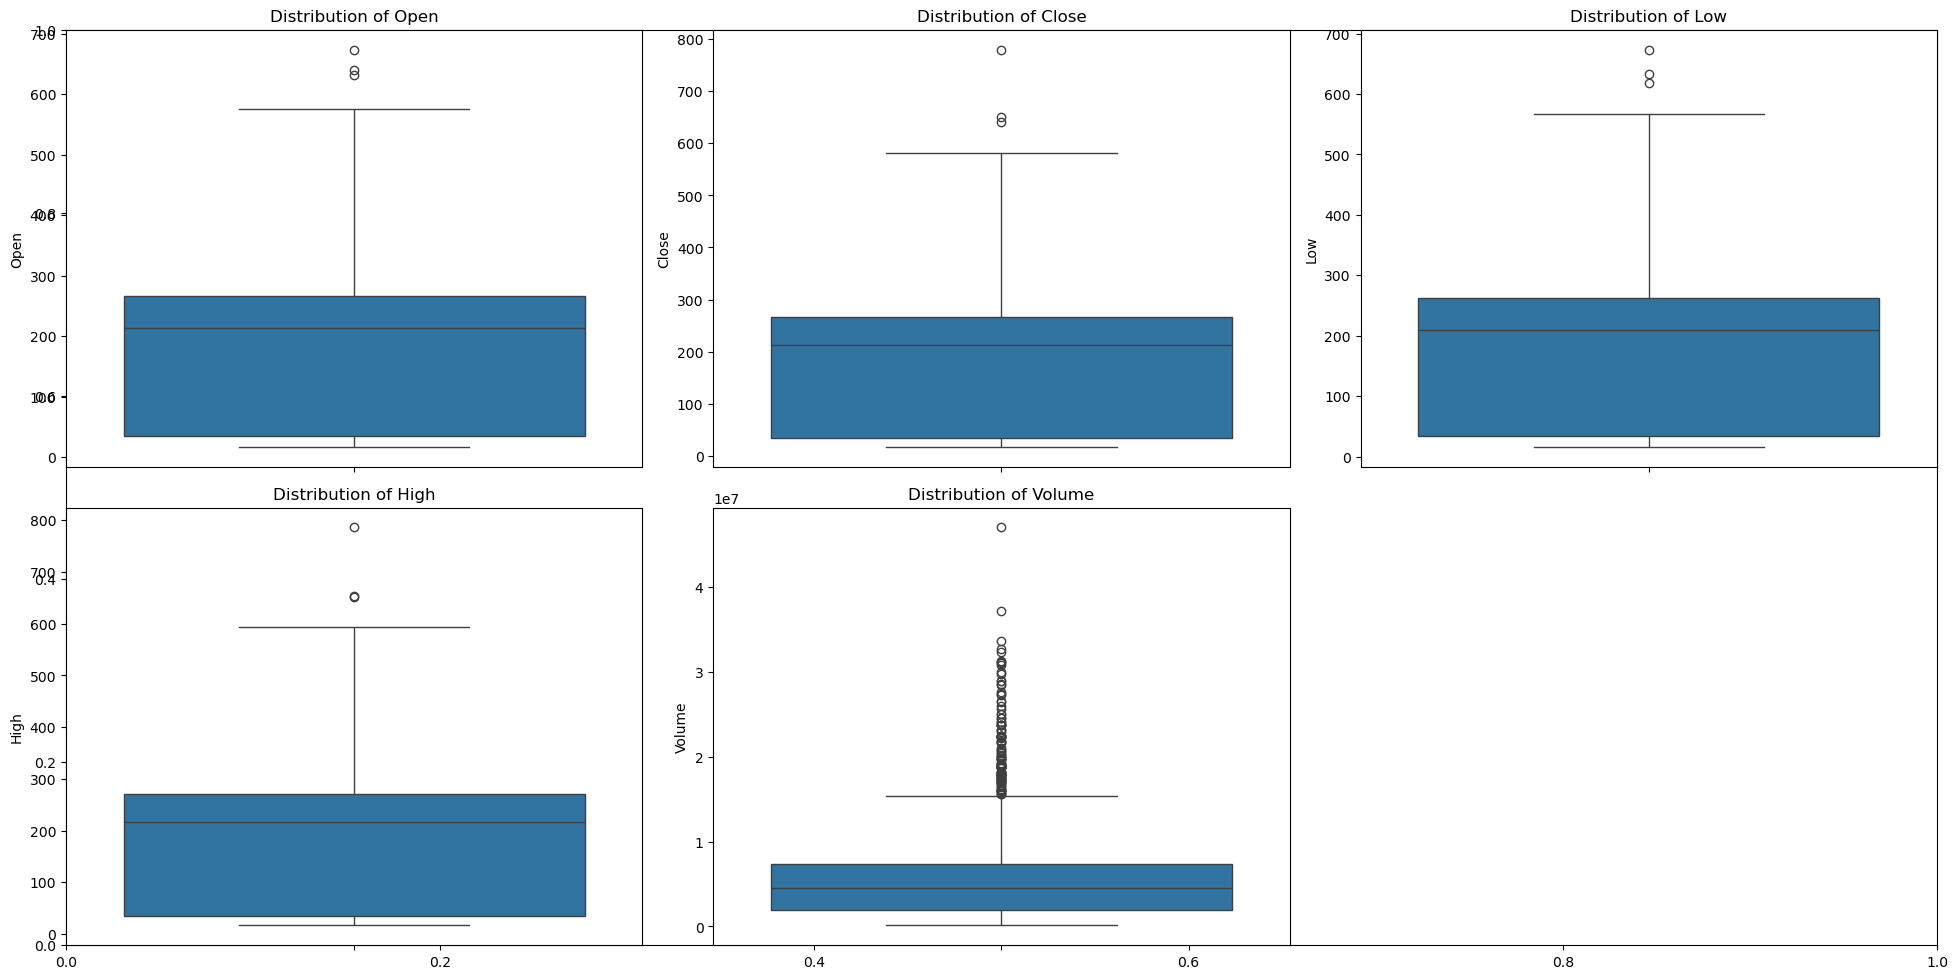

In [487]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(feature):
    plt.subplot(2, 3, i+1)
    sns.boxplot(tesla_data[col])
    plt.title(f"Distribution of {col}") 
plt.tight_layout()
plt.show()

####
The boxplot for Tesla's stock prices(open, close, high, low) and (volume) reveals the data's spread, central tendency, and potential outliers. A wide interquartile range indicates high volatility in prices, while outliers suggest unusual trading days that may correspond to significant events
Preprocessing steps like handling outliers or normalizing features can improve model accuracy and performance for prediction.

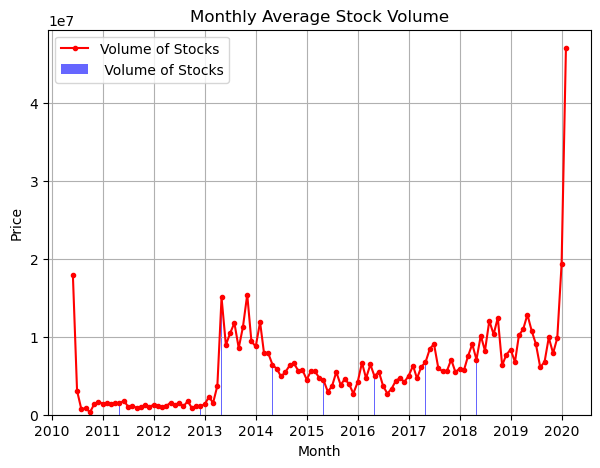

In [491]:
plt.figure(figsize=(7, 5))
plt.bar(month_mean['Month'], month_mean['Volume'], alpha = 0.6, label=' Volume of Stocks', color = 'blue')
plt.plot(month_mean['Month'], month_mean['Volume'], label = 'Volume of Stocks', marker = '.', color = 'red')
plt.title('Monthly Average Stock Volume')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [492]:
tesla_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Month'], dtype='object')

In [493]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1(children = ["Stock market Dashboard"]),
    dcc.DatePickerRange(
        id = 'date_range',
        start_date = '2010-06-29',
        end_date = '2020-02-03'
    ),
    dcc.RadioItems(
        id = 'data_res',
        options = {"1_day":"Daily"},
        value = "1_day",
        inline = True,
    ),
    dcc.Dropdown(id = 'Value Type',
                 options=[
                        {'label': ' Opening price in a day', 'value': 'Open'},
                        {'label': 'Highest price in a day', 'value': 'High'},
                        {'label': 'Lowest price in a day', 'value': 'Low'},
                        {'label': 'Close price in a day ','value':'Close'},
                        {'label': 'Adjacent Close price in a day ','value':'Adj Close'},
                        {'label': 'Volume of stock','value':'Volume'},
                        ],
                    value='Close', 
                    style={'width': '50%'}
                ),
    dcc.Graph(id = "Trend Graph")
])
@app.callback(
    Output(component_id = "Trend Graph",component_property = 'figure'),
    Input(component_id = "date_range",component_property = 'start_date'),
    Input(component_id = "date_range",component_property = 'end_date'),
    Input(component_id = "Value Type",component_property = 'value'),


)
def update_graph(start_date,end_date,Value_type):
    filtered_data = tesla_data[(tesla_data['Date'] >= start_date) & (tesla_data['Date']<= end_date)]

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=filtered_data['Date'],
        y=filtered_data[Value_type],
        mode='lines',
        name=Value_type
    ))
    fig.update_layout(
        title=f"{Value_type} Over Time",
        xaxis_title="Date",
        yaxis_title=Value_type,
        template="plotly_dark"
    )
    
    return fig

if __name__ == '__main__':
    app.run(debug = True,port = 8059)

This is an interactive dashboard which gives the value of the data selected from the dates. This varies for the value selected from the dropdown. which makes the more interactive. We can see the dates and the price of the data on the particular day.

## Feature Engineering

In [497]:
tesla_data['Year'] = tesla_data['Date'].dt.to_period('Y')

In [498]:
tesla_data['Month'] = pd.DatetimeIndex(tesla_data['Date']).month
tesla_data['Year'] = pd.DatetimeIndex(tesla_data['Date']).year
tesla_data['Day'] = pd.DatetimeIndex(tesla_data['Date']).day
tesla_data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Day
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,2010,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,2010,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,2010,1


In [499]:
tesla_data['IS_QuarterEnd'] = np.where(tesla_data['Month']%3 == 0,1,0)
tesla_data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Day,IS_QuarterEnd
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,2010,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,2010,30,1


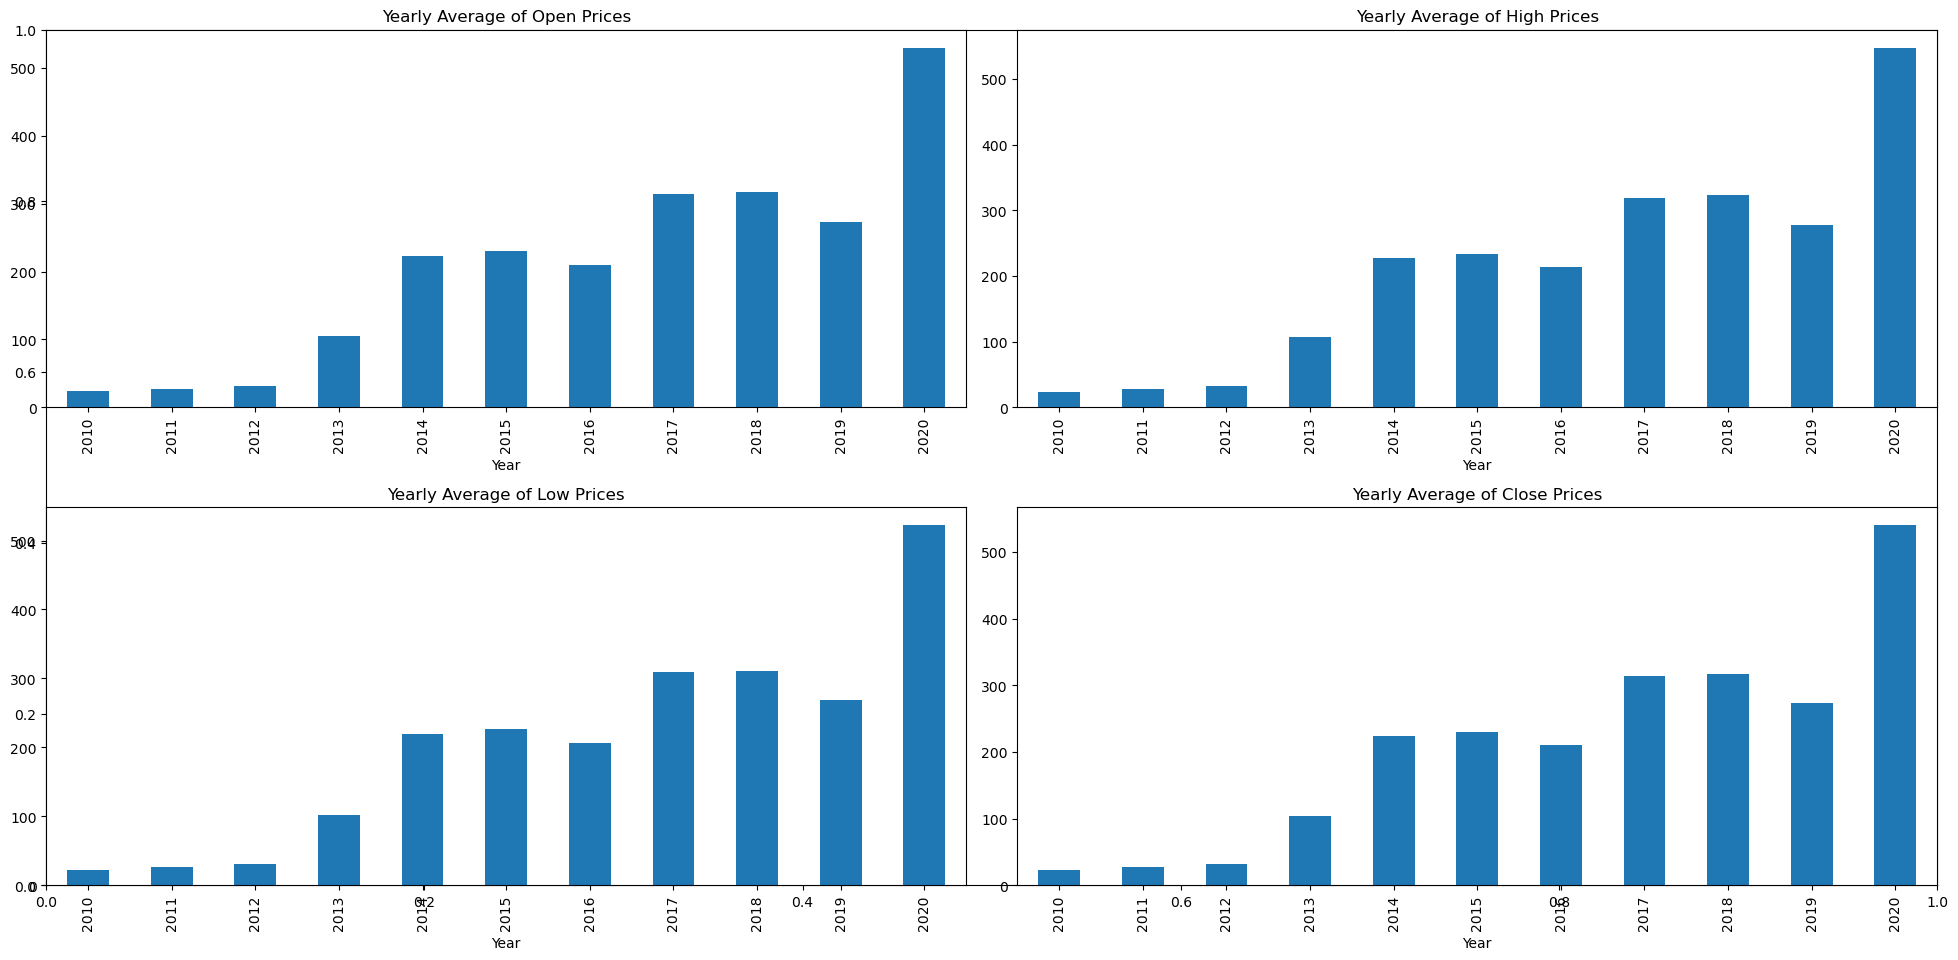

In [500]:
tesla_group = tesla_data.groupby('Year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    tesla_group[col].plot.bar()
    plt.title(f'Yearly Average of {col} Prices')

plt.tight_layout()
plt.show()

####
Yearly trends help in analyzing the annual performance of Tesla's stock prices, it provides historical context for forecasting future stock price behavior.
Summarize data: Reduces daily fluctuations into yearly trends, making patterns easier to interpret.

In [502]:
tesla_data.groupby('IS_QuarterEnd').mean()

tesla_data['Open-Close'] = tesla_data['Open'] - tesla_data['Close']
tesla_data['Low-High'] = tesla_data['Low'] - tesla_data['High']
tesla_data['Goal'] = np.where(tesla_data['Close'].shift(-1) > tesla_data['Close'], 1, 0)

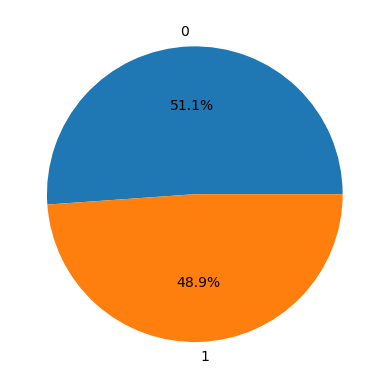

In [503]:
plt.pie(tesla_data['Goal'].value_counts().values,
        labels = [0,1], autopct = '%1.1f%%')
plt.show()

One is given to the diffrence of ["Open-Close"] is positive. \
Zero is give to the difference of ["Open-Close"] is negative.
The pie chart represents the same data.

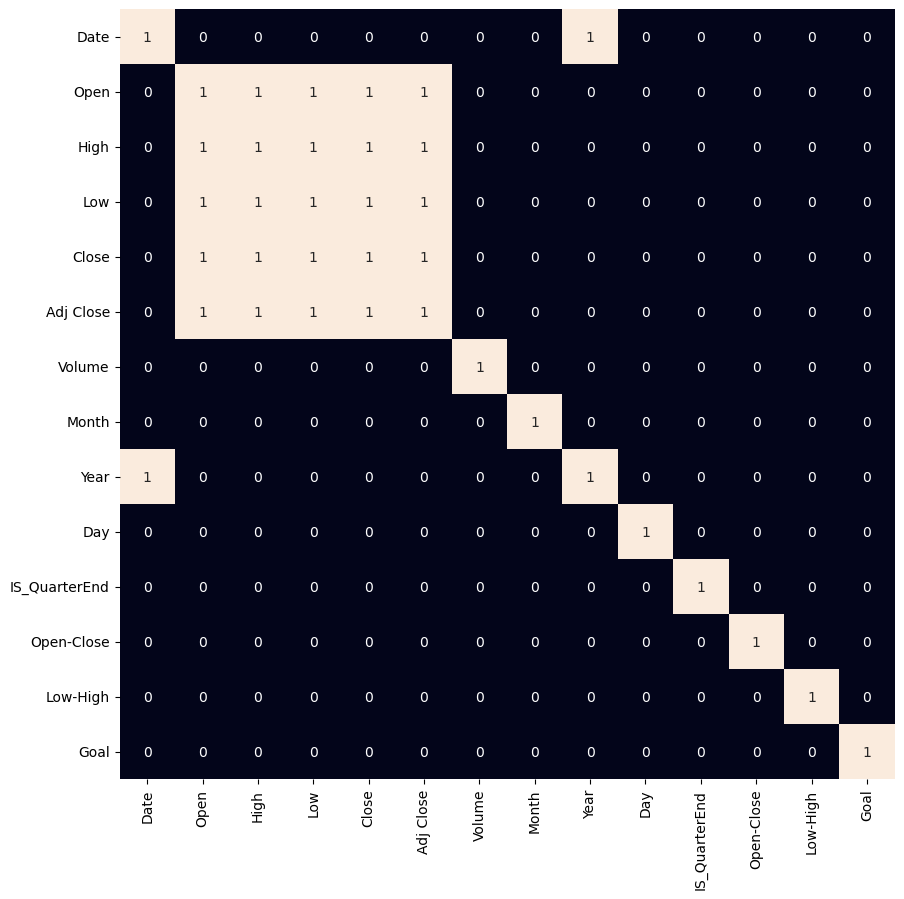

In [506]:
plt.figure(figsize = (10,10))
sns.heatmap(tesla_data.corr() > 0.9, annot = True, cbar = False)
plt.show()

####
This pie chart shows the balance between days when the stock price increased(Goal = 1) and decreased when (Goal = 0), highlighting potential class imbalance for model training. 
The heatmap reveals high correlations among the original OHLC features but confirms that the newly added features (open-close, Low-High) are not highly correlated with each other.
Overall, the dataset is well-prepared for predictive modeling, with features that enhance interpretability and model performance.

### Data Splitting and Normalization

In [509]:
x = tesla_data[['Open-Close','Low-High', 'IS_QuarterEnd']]
y = tesla_data['Goal']

scaler = StandardScaler()
x = scaler.fit_transform(x)

X_train , X_test, y_train, y_test =  train_test_split( x,y, test_size =0.1, 
                                                      random_state = 1000)
print(X_train.shape, X_test.shape)

(2174, 3) (242, 3)


### Model Development

In [511]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [512]:
y_pred = clf.predict(X_test)
y_probability = clf.predict_proba(X_test)
pd.DataFrame({'y_pred':y_pred, 'y_true':y_test, 'y_probability':y_probability[:,1]})

,y_pred,y_true,y_probability
1826,1,1,0.527024
565,1,0,0.524265
853,1,0,0.507498
1252,1,0,0.526387
888,0,0,0.499169
...,...,...,...
854,1,1,0.533263
2163,0,1,0.489351
526,1,1,0.509166
450,1,1,0.504932


In [514]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 29,  90],
       [ 13, 110]], dtype=int64)

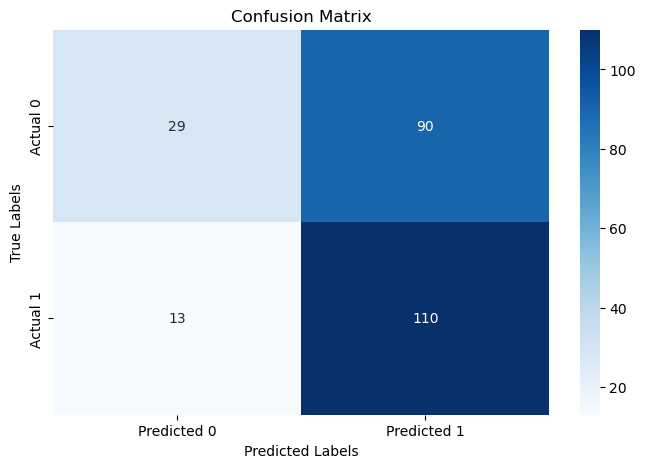

In [515]:
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Predicted 0', 'Predicted 1'],
            yticklabels = ['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

####
The above heatmap shows the actual and predicted values for binary classification. It will display true negative, true positive, false positive and false negative values clearly.

In [517]:
model = [LogisticRegression(),
         SVC(kernel = 'poly', probability = True), XGBClassifier()]

for i in range(3):
    model[i].fit(X_train, y_train)
    train_auc = metrics.roc_auc_score(y_train, model[i].predict_proba(X_train)[:,1])
    test_auc = metrics.roc_auc_score(y_test, model[i].predict_proba(X_test)[:,1])

print(f'{model[i]}:')
print(f'Training AUC-ROC Score: {train_auc:.4f}')
print(f'Testing AUC-ROC Score: {test_auc:.4f}')
print('-'*40)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
Training AUC-ROC Score: 0.9423
Testing AUC-ROC Score: 0.5237
----------------------------------------


####
The XGBClassifier performs the best, but the large gap between training and testing accuracy suggests overfitting. This means its too closely fitted to the training data and may not generalize well to the new data.

In [519]:
for i in range(3):
    model[i].fit(X_train, y_train)
    train_rmse = metrics.root_mean_squared_error(y_train, model[i].predict_proba(X_train)[:,1])
    test_rmse = metrics.root_mean_squared_error(y_test, model[i].predict_proba(X_test)[:,1])

print(f'{model[i]}:')
print(f'Training Root meansquared error: {train_rmse:.4f}')
print(f'Testing Root meansquared error: {test_rmse:.4f}')
print('-'*40)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
Training Root meansquared error: 0.3601
Testing Root meansquared error: 0.5357
----------------------------------------


In [520]:
tesla_pivot = pd.pivot_table(tesla_data, values = ['Open','Close'],
                             columns = 'Year',
                             index = 'Month')
tesla_pivot.head(3)

Close                                                          \
Year   2010       2011      2012       2013        2014        2015   
Month                                                                 
1       NaN  25.643000  27.49000  35.188571  164.051905  203.255499   
2       NaN  23.333684  32.76200  37.366316  206.023157  210.673159   
3       NaN  23.708696  35.24091  37.043000  233.146667  194.718184   

                                                       ...       Open  \
Year         2016        2017        2018        2019  ...       2011   
Month                                                  ...              
1      204.562105  239.320499  338.583335  318.494284  ...  25.807500   
2      169.670000  263.711058  335.777369  307.728421  ...  23.395263   
3      216.147273  258.156522  315.983335  277.757140  ...  23.640870   

                                                                           \
Year      2012       2013        2014        2015        2016        2017   
Month                                                                       
1      27.7560  35.161905  162.742382  202.902501  206.961579  237.936000   
2      32.5145  37.528421  206.239998  209.653158  169.812499  262.833159   
3      35.1350  37.004500  235.823809  195.458183  215.000454  257.758262   

                                           
Year         2018        2019        2020  
Month                                      
1      336.888096  316.690953  523.045239  
2      336.316840  307.196843  673.690002  
3      317.428095  278.870953         NaN  

[3 rows x 22 columns]

array([[<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>],
       [<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>],
       [<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>],
       [<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>],
       [<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
        <Axes: xlabel='Month'>]], dtype=object)

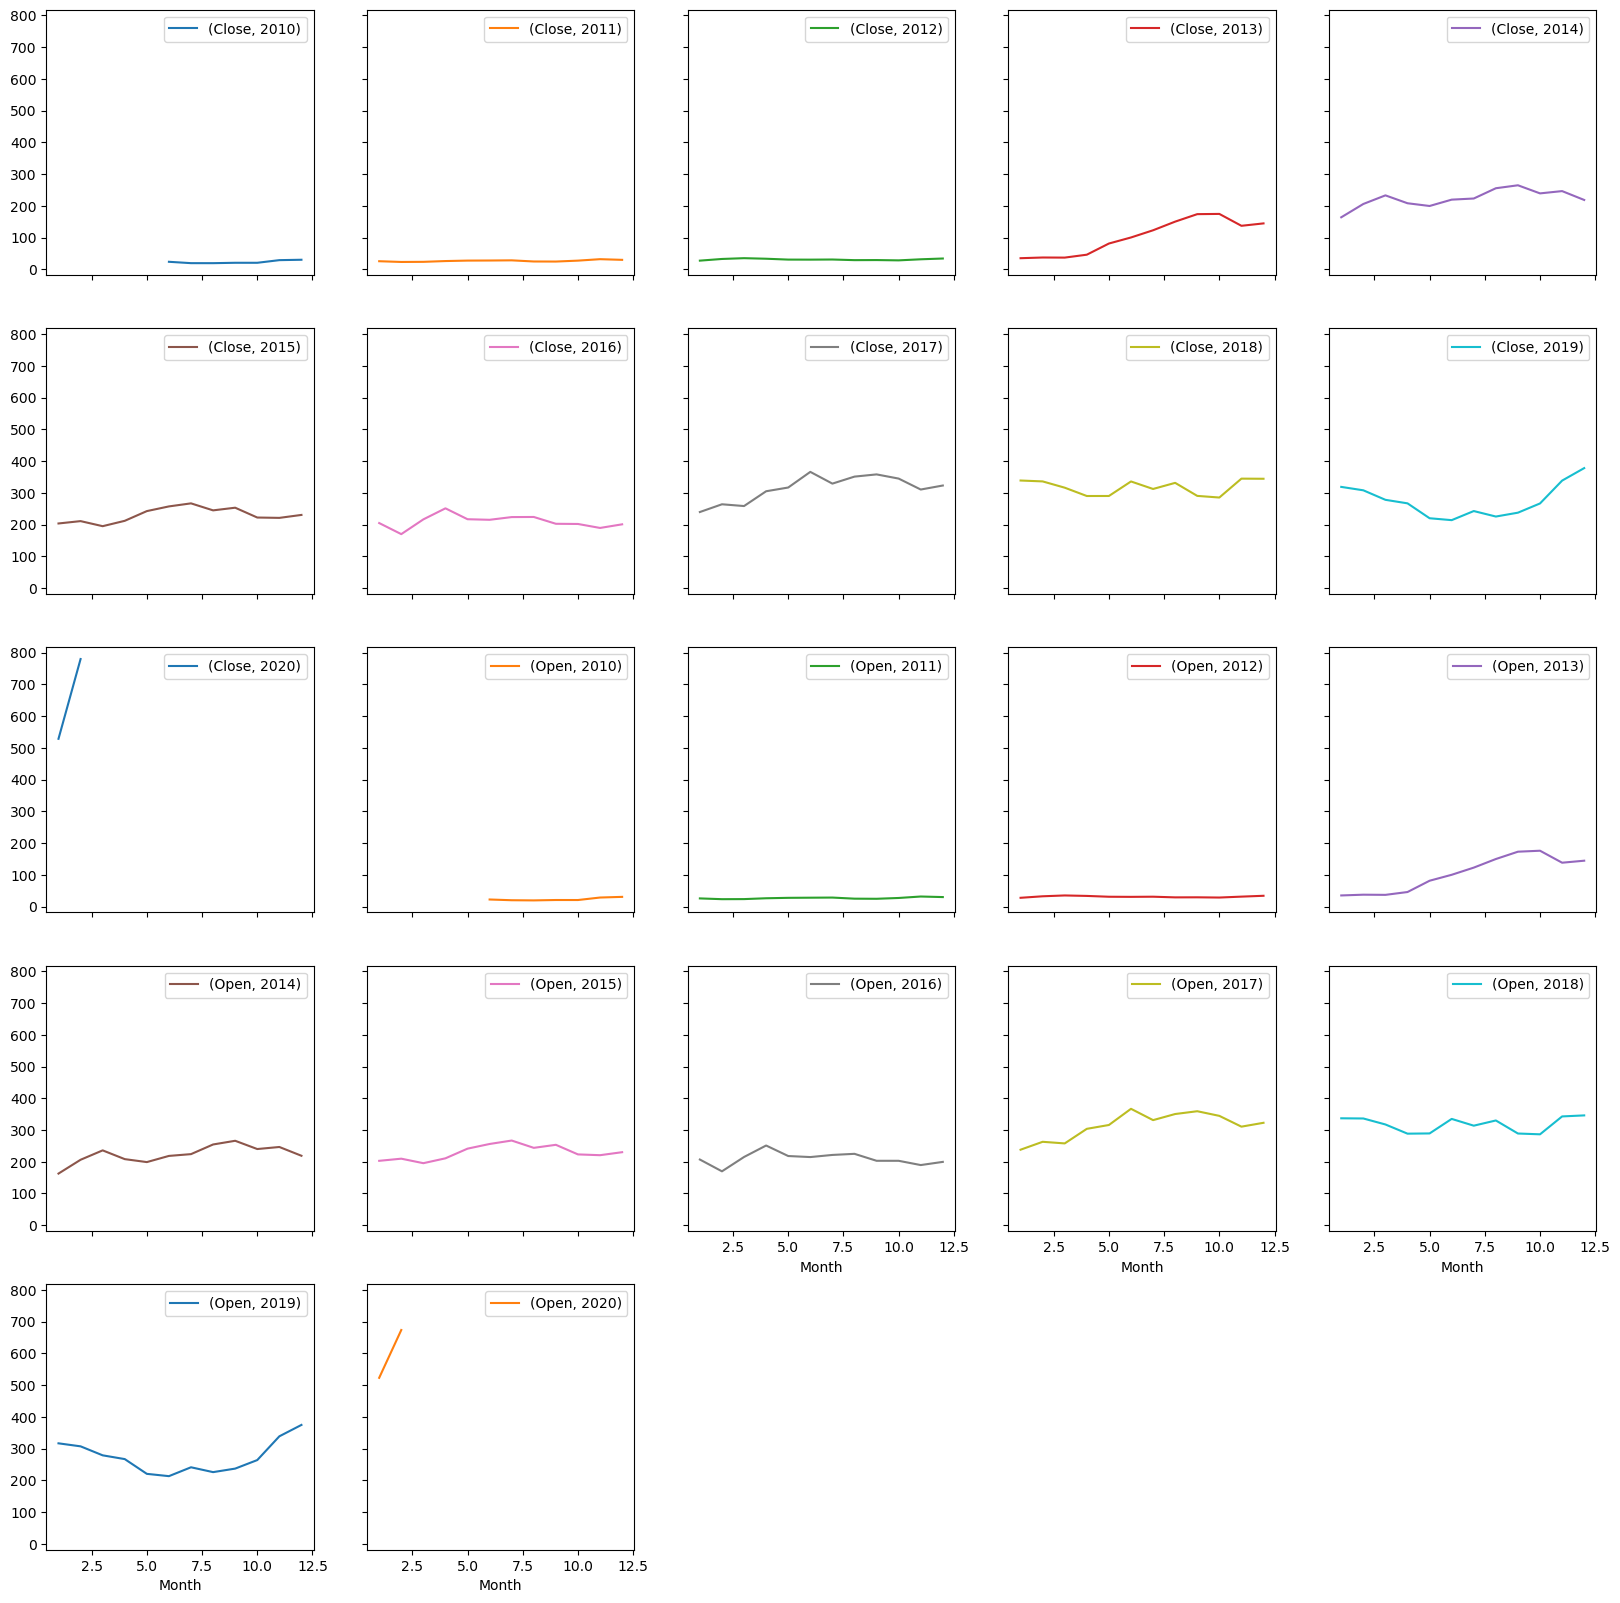

In [521]:
tesla_pivot.plot(subplots = True, figsize = (20,20), layout = (5,5), sharey = True)

In [524]:
tesla_data['Openlog'] = np.log(tesla_data.Open)
tesla_data['Closelog'] = np.log(tesla_data.Close) 
tesla_data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Day,IS_QuarterEnd,Open-Close,Low-High,Goal,Openlog,Closelog
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,2010,29,1,-4.889999,-7.459999,0,2.944439,3.173460
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,2010,30,1,1.960001,-7.120001,0,3.249987,3.170945
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,2010,1,0,3.040001,-5.650000,0,3.218876,3.089223


<Axes: >

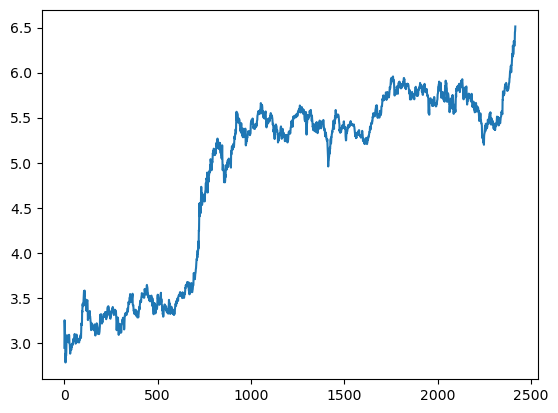

In [525]:
tesla_data.Openlog.plot()

<Axes: >

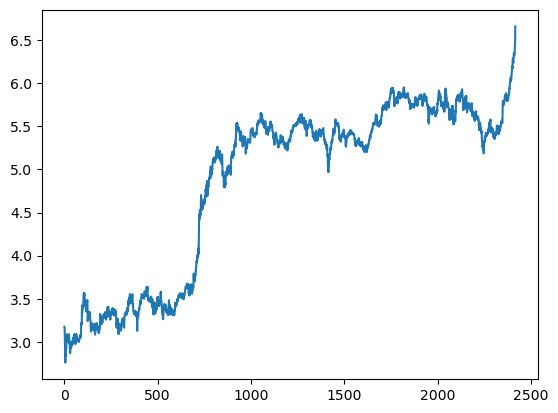

In [527]:
tesla_data.Closelog.plot()

In [528]:
tesla_open_pred = tesla_data.Openlog.mean()
tesla_close_pred = tesla_data.Closelog.mean()
tesla_data['Open_mean'] = np.exp(tesla_open_pred)
tesla_data['Close_mean'] = np.exp(tesla_close_pred)

<Axes: xlabel='Date'>

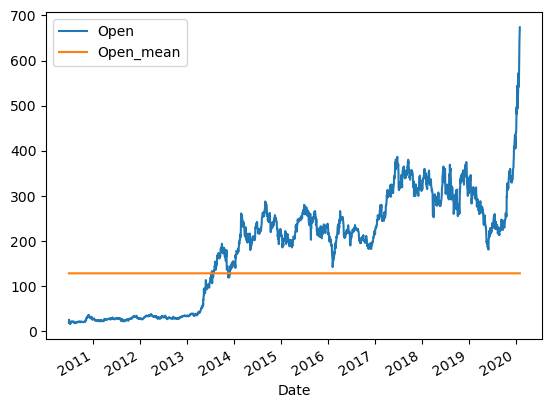

In [529]:
tesla_data.plot( x = 'Date', y= ['Open', 'Open_mean'], kind = 'line')

<Axes: xlabel='Date'>

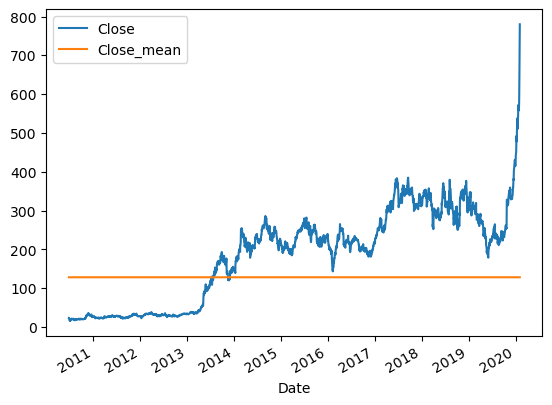

In [530]:
tesla_data.plot( x = 'Date', y= ['Close', 'Close_mean'], kind = 'line')

<Axes: xlabel='Date'>

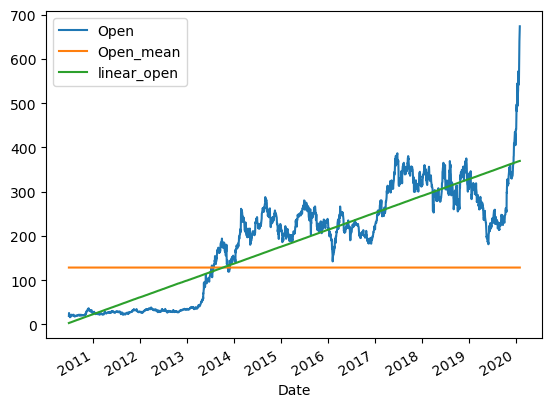

In [534]:
x_open = np.arange(tesla_data.shape[0]).reshape((-1,1))
y_open = tesla_data.Open.values.reshape((-1,1))
reg_open = linear_model.LinearRegression()
pred_open = reg_open.fit(x_open, y_open).predict(x_open)

tesla_data['linear_open'] = pred_open
tesla_data.plot( x = 'Date', y= ['Open', 'Open_mean', 'linear_open'], kind = 'line')

In [535]:
tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Day,IS_QuarterEnd,Open-Close,Low-High,Goal,Openlog,Closelog,Open_mean,Close_mean,linear_open
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,2010,29,1,-4.889999,-7.459999,0,2.944439,3.173460,128.474133,128.465074,3.127004
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,2010,30,1,1.960001,-7.120001,0,3.249987,3.170945,128.474133,128.465074,3.278676
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,2010,1,0,3.040001,-5.650000,0,3.218876,3.089223,128.474133,128.465074,3.430348
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,2010,2,0,3.799999,-4.390001,0,3.135494,2.954910,128.474133,128.465074,3.582020
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,2010,6,0,3.889999,-4.170000,0,2.995732,2.779440,128.474133,128.465074,3.733693


<Axes: xlabel='Date'>

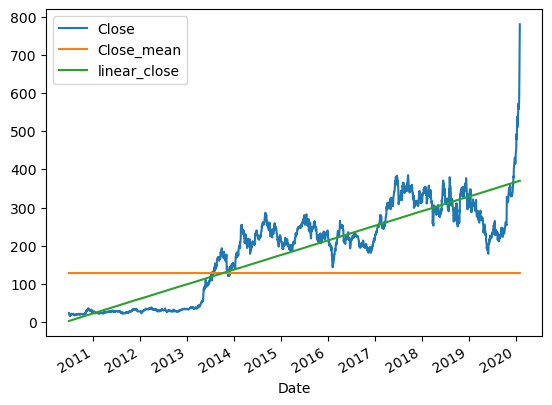

In [536]:
x_close = np.arange(tesla_data.shape[0]).reshape((-1,1))
y_close = tesla_data.Close.values.reshape((-1,1))
reg_close = linear_model.LinearRegression()
pred_close = reg_close.fit(x_close, y_close).predict(x_close)

tesla_data['linear_close'] = pred_close
tesla_data.plot( x = 'Date', y= ['Close', 'Close_mean', 'linear_close'], kind = 'line')

In [537]:
tesla_data.Date = pd.DatetimeIndex(tesla_data.Date)
tesla_data.index = pd.PeriodIndex(tesla_data.Date, freq = 'D')
tesla_data.head(3)

tesla_data['TimeIndex'] = tesla_data.Date - tesla_data.Date.min()
tesla_data['TimeIndex'] = tesla_data['TimeIndex'] / np.timedelta64(1,'D')
tesla_data.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Day,...,Open-Close,Low-High,Goal,Openlog,Closelog,Open_mean,Close_mean,linear_open,linear_close,TimeIndex
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,2020-01-30,632.419983,650.880005,618.00000,640.809998,640.809998,29005700,1,2020,30,...,-8.390015,-32.880005,1,6.449554,6.462733,128.474133,128.465074,369.111945,369.685453,3502.0
2020-01-31,2020-01-31,640.000000,653.000000,632.52002,650.570007,650.570007,15719300,1,2020,31,...,-10.570007,-20.479980,1,6.461468,6.477849,128.474133,128.465074,369.263617,369.837491,3503.0
2020-02-03,2020-02-03,673.690002,786.140015,673.52002,780.000000,780.000000,47065000,2,2020,3,...,-106.309998,-112.619995,0,6.512770,6.659294,128.474133,128.465074,369.415289,369.989529,3506.0


In [538]:
tesla_linear_model_open = smf.ols('Openlog ~ TimeIndex', data = tesla_data).fit()
tesla_linear_model_open.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Openlog   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     8182.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:11:07   Log-Likelihood:                -1671.8
No. Observations:                2416   AIC:                             3348.
Df Residuals:                    2414   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3161      0.020    168.674      0.000       3.278       3.355
TimeIndex      0.0009   9.72e-06     90.456      0.000       0.001       0.001
==============================================================================
Omnibus:                      573.291   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.039
Skew:                           0.236   Prob(JB):                     1.16e-27
Kurtosis:                       1.995   Cond. No.                     4.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [541]:
tesla_linear_model_open.params

Intercept    3.316076
TimeIndex    0.000879
dtype: float64

In [543]:
tesla_linear_pred_open = tesla_linear_model_open.predict()
tesla_data['Linear_stat_model_open'] = tesla_linear_pred_open
tesla_data.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Day,...,Low-High,Goal,Openlog,Closelog,Open_mean,Close_mean,linear_open,linear_close,TimeIndex,Linear_stat_model_open
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,2020-01-30,632.419983,650.880005,618.00000,640.809998,640.809998,29005700,1,2020,30,...,-32.880005,1,6.449554,6.462733,128.474133,128.465074,369.111945,369.685453,3502.0,6.394561
2020-01-31,2020-01-31,640.000000,653.000000,632.52002,650.570007,650.570007,15719300,1,2020,31,...,-20.479980,1,6.461468,6.477849,128.474133,128.465074,369.263617,369.837491,3503.0,6.395440
2020-02-03,2020-02-03,673.690002,786.140015,673.52002,780.000000,780.000000,47065000,2,2020,3,...,-112.619995,0,6.512770,6.659294,128.474133,128.465074,369.415289,369.989529,3506.0,6.398077


#### Below shows the linear model data for open column

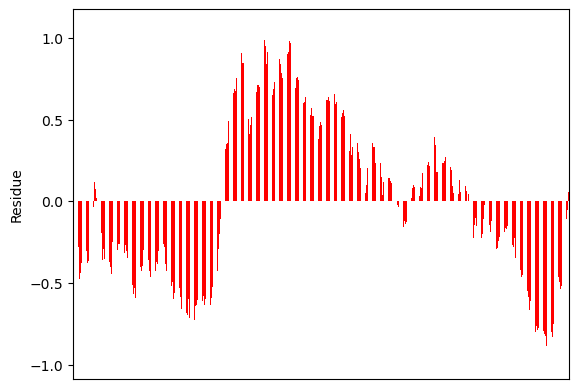

In [545]:
tesla_linear_model_open.resid.plot(kind = 'bar', color = 'red',ylabel = 'Residue').get_xaxis().set_visible(False)

<Axes: xlabel='TimeIndex', ylabel='Prices'>

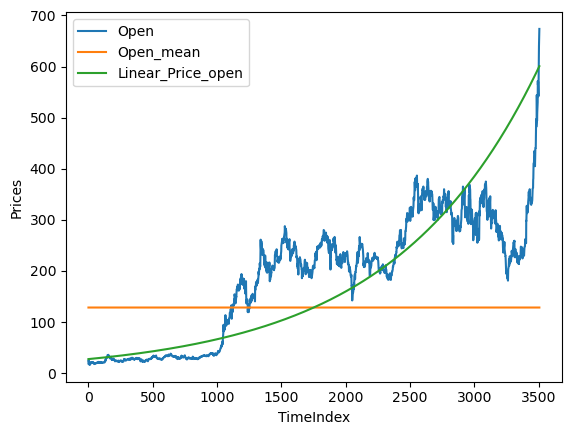

In [546]:
forecast_tesla_open =  tesla_linear_model_open.predict(exog = pd.DataFrame(dict(TimeIndex = 252),
                                                                 index = [0]))
tesla_data['Linear_Price_open'] = np.exp(tesla_linear_pred_open)
tesla_data.plot(x = 'TimeIndex', y = ['Open', 'Open_mean', 'Linear_Price_open'], kind = 'line',ylabel= 'Prices')

In [548]:
tesla_linear_model_close = smf.ols('Closelog ~ TimeIndex', data = tesla_data).fit()
tesla_linear_model_close.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Closelog   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     8196.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:11:16   Log-Likelihood:                -1672.8
No. Observations:                2416   AIC:                             3350.
Df Residuals:                    2414   BIC:                             3361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3141      0.020    168.505      0.000       3.276       3.353
TimeIndex      0.0009   9.72e-06     90.531      0.000       0.001       0.001
==============================================================================
Omnibus:                      573.875   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.753
Skew:                           0.234   Prob(JB):                     1.34e-27
Kurtosis:                       1.995   Cond. No.                     4.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [549]:
tesla_linear_model_close.params

Intercept    3.314108
TimeIndex    0.000880
dtype: float64

In [550]:
tesla_linear_model_close.rsquared

0.7724753529673801

In [551]:
tesla_linear_pred_close = tesla_linear_model_close.predict()
tesla_data['Linear_stat_model_close'] = tesla_linear_pred_open
tesla_data.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Day,...,Openlog,Closelog,Open_mean,Close_mean,linear_open,linear_close,TimeIndex,Linear_stat_model_open,Linear_Price_open,Linear_stat_model_close
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,2020-01-30,632.419983,650.880005,618.00000,640.809998,640.809998,29005700,1,2020,30,...,6.449554,6.462733,128.474133,128.465074,369.111945,369.685453,3502.0,6.394561,598.580590,6.394561
2020-01-31,2020-01-31,640.000000,653.000000,632.52002,650.570007,650.570007,15719300,1,2020,31,...,6.461468,6.477849,128.474133,128.465074,369.263617,369.837491,3503.0,6.395440,599.107013,6.395440
2020-02-03,2020-02-03,673.690002,786.140015,673.52002,780.000000,780.000000,47065000,2,2020,3,...,6.512770,6.659294,128.474133,128.465074,369.415289,369.989529,3506.0,6.398077,600.689060,6.398077


#### Below shows the Linear model data for the close column

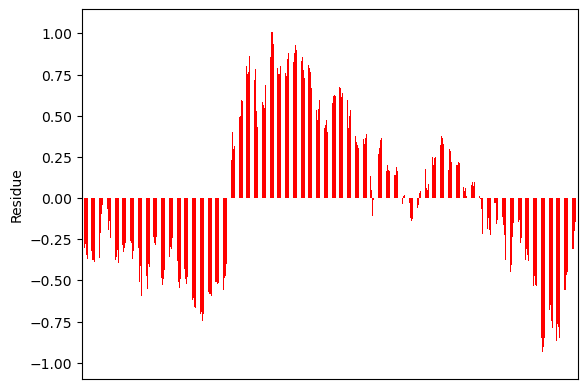

In [558]:
tesla_linear_model_close.resid.plot(kind = 'bar', color = 'red',ylabel='Residue').get_xaxis().set_visible(False)                      

<Axes: xlabel='TimeIndex', ylabel='Prices'>

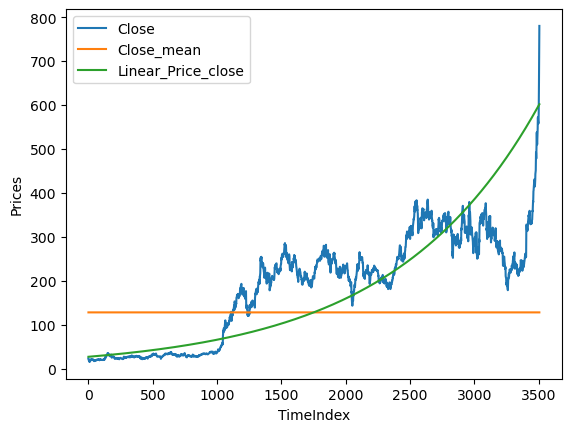

In [559]:
forecast_tesla_close =  tesla_linear_model_close.predict(exog = pd.DataFrame(dict(TimeIndex = 252),
                                                                 index = [0]))
tesla_data['Linear_Price_close'] = np.exp(tesla_linear_pred_close)
tesla_data.plot(x = 'TimeIndex', y = ['Close', 'Close_mean', 'Linear_Price_close'], kind = 'line',ylabel = 'Prices')

### LSTM model with ['Open','High','Low','Close'] as features

In [561]:
tesla = pd.read_csv("./Data/tesla_data.csv")
tesla.head(3) # reading of the data from the start again for LSTM model

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800


In [562]:
features = tesla[['Open','High','Low','Close']].values

In [563]:
scaler = MinMaxScaler( feature_range = (0,1))
data_scaled = scaler.fit_transform(features)
data_scaled

array([[0.00434948, 0.01087705, 0.00388739, 0.01058623],
       [0.01467569, 0.0179205 , 0.01263401, 0.01050772],
       [0.01347426, 0.01207262, 0.00803292, 0.00806072],
       ...,
       [0.93723668, 0.8242258 , 0.91569226, 0.81786181],
       [0.94876435, 0.82698079, 0.93774107, 0.83063335],
       [1.        , 1.        , 1.        , 1.        ]])

In [564]:
def create_dataset(dataset, time_step = 1):
    X,Y = [], []
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i + time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, -1 ])
    return np.array(X), np.array(Y)

In [565]:
train = int(len(data_scaled) * 0.70)
test = len(data_scaled) - train
train_data , test_data = data_scaled[0: train, :], data_scaled[train:len(data_scaled), :]

In [566]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [567]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 4)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],4)

In [568]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(100, 4)), 
    tf.keras.layers.LSTM(50, return_sequences=False),  
    tf.keras.layers.Dense(25), 
    tf.keras.layers.Dense(1)  
])
model.summary()

C:\Users\Chaitu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 100, 50)        │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,501 (126.96 KB)

 Trainable params: 32,501 (126.96 KB)

 Non-trainable params: 0 (0.00 B)

Stacked LSTM Model

In [571]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1,shuffle = True)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(np.concatenate((np.zeros((len(train_predict), 3)), train_predict), axis=1))[:, 3]
test_predict = scaler.inverse_transform(np.concatenate((np.zeros((len(test_predict), 3)), test_predict), axis=1))[:, 3]

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.0115 - val_loss: 0.0017
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 5.3500e-04 - val_loss: 0.0015
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 1.9077e-04 - val_loss: 0.0014
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 1.8696e-04 - val_loss: 0.0013
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 1.6953e-04 - val_loss: 0.0013
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 1.6754e-04 - val_loss: 0.0012
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 1.6996e-04 - val_loss: 0.0012
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 1.5819e-04 - val_loss: 0.0011
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 1.7193e-04 - val_loss: 0.0011
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 1.5267e-04 - val_loss: 0.0012
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 1.5728e-04 - val_loss: 0.0011
Epoch 12/10

In [572]:
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))

print(f"Training RMSE: {train_rmse:.9f}")
print(f"Testing RMSE: {test_rmse:.9f}")

Training RMSE: 167.3552
Testing RMSE: 310.1725


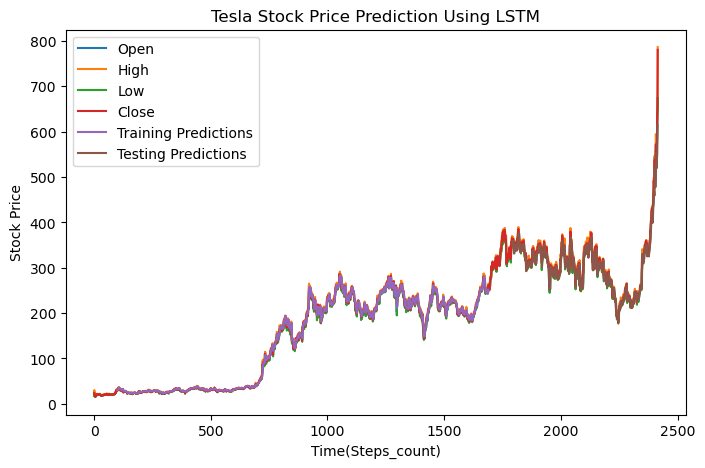

In [573]:
train_plot = np.empty_like(data_scaled[:,3])
train_plot[:] = np.nan
train_plot[time_step:len(train_predict) + time_step] = train_predict

test_plot = np.empty_like(data_scaled[:,3])
test_plot[:] = np.nan
test_plot[len(train_predict) + (time_step * 2) + 1:len(data_scaled) - 1] = test_predict

plt.figure(figsize=(8, 5))
plt.plot(scaler.inverse_transform(data_scaled), label=['Open','High','Low','Close'])
plt.plot(train_plot, label='Training Predictions')
plt.plot(test_plot, label='Testing Predictions')
plt.title('Tesla Stock Price Prediction Using LSTM')
plt.xlabel('Time(Steps_count)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

The Graph plotted based on the features open close low and high from the data. The Graph is also included the Training predicted values and testing predicted values as well. With this kind we can able to analyze the model and compared with the data as well.

#### LSTM MOdel for with Open as a feature 

In [576]:
tesla_open = pd.read_csv("./Data/tesla_data.csv")
features_open = tesla_data[['Open']].values

In [577]:
scaler_open = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(features_open)

In [578]:
def create_dataset(dataset, time_step=1):
    X_open, Y_open = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  
        X_open.append(a)
        Y_open.append(dataset[i + time_step, 0])  
    return np.array(X_open), np.array(Y_open)

In [581]:
training_size = int(len(data_scaled) * 0.7)
test_size = len(data_scaled) - training_size 
train_data, test_data = data_scaled[0:training_size, :], data_scaled[training_size:len(data_scaled), :]

In [582]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [583]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [584]:
model_open = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(100, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25), 
    tf.keras.layers.Dense(1)  
])

C:\Users\Chaitu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [585]:
model_open.compile(optimizer='adam', loss='mean_squared_error')
model_open.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)
train_predict_open = model_open.predict(X_train)
test_predict_open = model_open.predict(X_test)
train_predict_open = scaler.inverse_transform(train_predict_open)
test_predict_open = scaler.inverse_transform(test_predict_open)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 0.0135 - val_loss: 0.0019
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 4.9092e-04 - val_loss: 0.0022
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 3.0651e-04 - val_loss: 0.0018
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 2.9196e-04 - val_loss: 0.0018
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 2.7809e-04 - val_loss: 0.0020
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 2.8652e-04 - val_loss: 0.0016
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 2.4667e-04 - val_loss: 0.0017
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 2.4809e-04 - val_loss: 0.0018
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 2.4354e-04 - val_loss: 0.0015
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 2.4089e-04 - val_loss: 0.0015
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 2.3708e-04 - val_loss: 0.0022
Epoch 12/10

In [586]:
train_rmse_open = math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict_open))
test_rmse_open = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), test_predict_open))
print(f"Training RMSE for open: {train_rmse:.9f}")
print(f"Testing RMSE for Open: {test_rmse:.9f}")

Training RMSE for open: 167.355178844
Testing RMSE for Open: 310.172460851


In [587]:
train_plot = np.empty_like(data_scaled)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict_open) + time_step, :] = train_predict_open
test_plot = np.empty_like(data_scaled)
test_plot[:, :] = np.nan
test_plot[len(train_predict_open) + (time_step * 2) + 1:len(data_scaled) - 1, :] = test_predict_open

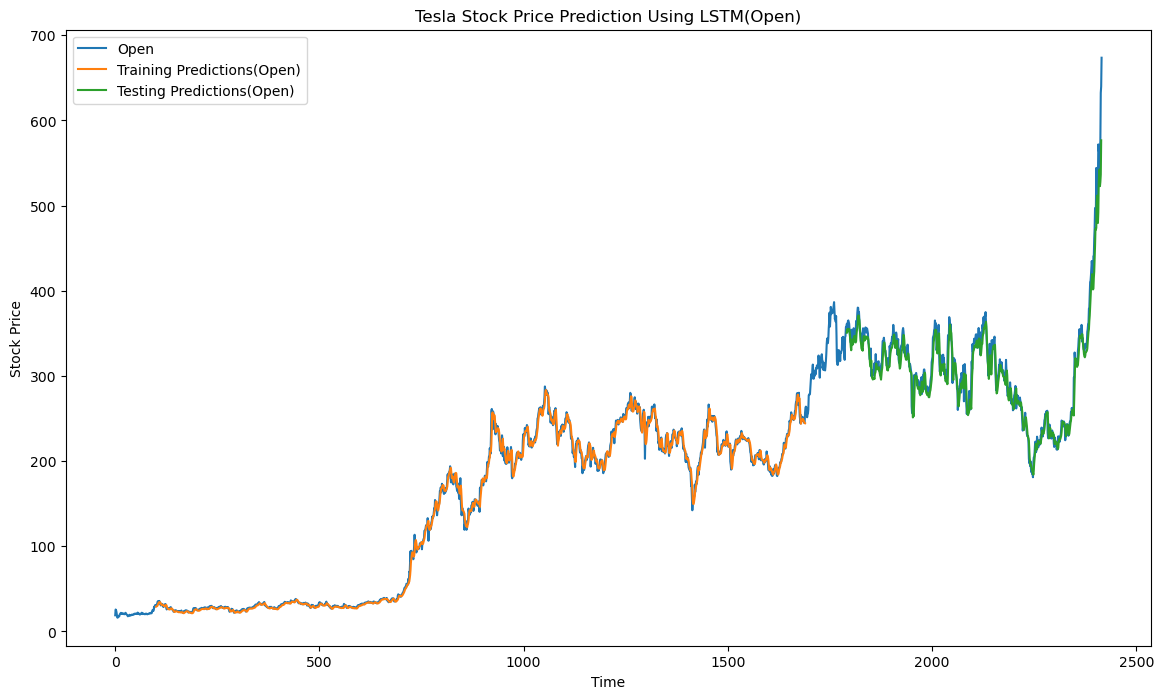

In [588]:
plt.figure(figsize=(14, 8))
plt.plot(scaler.inverse_transform(data_scaled), label='Open')
plt.plot(train_plot, label='Training Predictions(Open)')
plt.plot(test_plot, label='Testing Predictions(Open)')
plt.title('Tesla Stock Price Prediction Using LSTM(Open)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### LSTM Model for with Close as a feature 

In [590]:
tesla_close = pd.read_csv("./Data/tesla_data.csv")
features_close = tesla_data[['Close']].values

In [591]:
scaler_close = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(features_close)

In [592]:
def create_dataset(dataset, time_step=1):
    X_close, Y_close = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  
        X_close.append(a)
        Y_close.append(dataset[i + time_step, 0])  
    return np.array(X_close), np.array(Y_close)

In [593]:
training_size = int(len(data_scaled) * 0.7)
test_size = len(data_scaled) - training_size 
train_data, test_data = data_scaled[0:training_size, :], data_scaled[training_size:len(data_scaled), :]

In [594]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [595]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [596]:
model_close = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(100, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25), 
    tf.keras.layers.Dense(1)  
])

C:\Users\Chaitu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [597]:
model_close.compile(optimizer='adam', loss='mean_squared_error')
model_close.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)
train_predict_close = model_close.predict(X_train)
test_predict_close = model_close.predict(X_test)
train_predict_close = scaler.inverse_transform(train_predict_close)
test_predict_close = scaler.inverse_transform(test_predict_close)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 0.0111 - val_loss: 0.0022
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 5.1662e-04 - val_loss: 0.0015
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 2.3973e-04 - val_loss: 0.0011
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 1.9334e-04 - val_loss: 0.0011
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 1.9798e-04 - val_loss: 0.0011
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 1.8378e-04 - val_loss: 0.0011
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 1.8621e-04 - val_loss: 9.9872e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 1.6543e-04 - val_loss: 9.1934e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 1.8329e-04 - val_loss: 9.6617e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 1.5296e-04 - val_loss: 8.9056e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 1.6153e-04 - val_loss: 

In [598]:
train_rmse_close = math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict_close))
test_rmse_close = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), test_predict_close))
print(f"Training RMSE for close: {train_rmse:.9f}")
print(f"Testing RMSE for close: {test_rmse:.9f}")

Training RMSE for close: 167.355178844
Testing RMSE for close: 310.172460851


In [599]:
train_plot = np.empty_like(data_scaled)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict_close) + time_step, :] = train_predict_close
test_plot = np.empty_like(data_scaled)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2) + 1:len(data_scaled) - 1, :] = test_predict_close

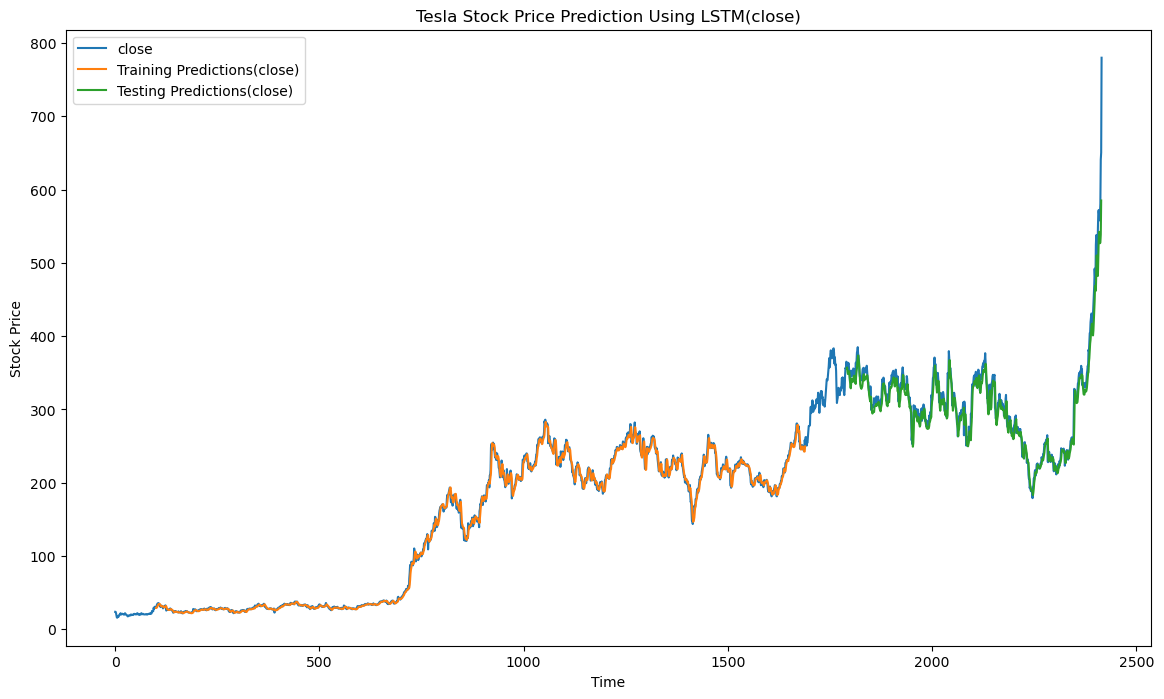

In [600]:
plt.figure(figsize=(14, 8))
plt.plot(scaler.inverse_transform(data_scaled), label='close')
plt.plot(train_plot, label='Training Predictions(close)')
plt.plot(test_plot, label='Testing Predictions(close)')
plt.title('Tesla Stock Price Prediction Using LSTM(close)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### LSTM Model for with Low as a feature 

In [603]:
tesla_low = pd.read_csv("./Data/tesla_data.csv")
features_low = tesla_data[['Low']].values

In [604]:
scaler_low = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(features_low)

In [605]:
def create_dataset(dataset, time_step=1):
    X_low, Y_low = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  
        X_low.append(a)
        Y_low.append(dataset[i + time_step, 0])  
    return np.array(X_low), np.array(Y_low)

In [607]:
training_size = int(len(data_scaled) * 0.7)
test_size = len(data_scaled) - training_size 
train_data, test_data = data_scaled[0:training_size, :], data_scaled[training_size:len(data_scaled), :]

In [609]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [610]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [611]:
model_low = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(100, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25), 
    tf.keras.layers.Dense(1)  
])

C:\Users\Chaitu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [614]:
model_low.compile(optimizer='adam', loss='mean_squared_error')
model_low.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)
train_predict_low = model_low.predict(X_train)
test_predict_low = model_low.predict(X_test)
train_predict_low = scaler.inverse_transform(train_predict_low)
test_predict_low = scaler.inverse_transform(test_predict_low)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.0148 - val_loss: 0.0028
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 7.8613e-04 - val_loss: 0.0017
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 3.2830e-04 - val_loss: 0.0013
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 2.7216e-04 - val_loss: 0.0013
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 2.2568e-04 - val_loss: 0.0012
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 2.2423e-04 - val_loss: 0.0012
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 2.3736e-04 - val_loss: 0.0013
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 2.1888e-04 - val_loss: 0.0012
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 2.0812e-04 - val_loss: 0.0011
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 2.1724e-04 - val_loss: 0.0012
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 2.0089e-04 - val_loss: 9.9896e-04
Epoc

In [615]:
train_rmse_low = math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict_low))
test_rmse_low = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), test_predict_low))
print(f"Training RMSE for low: {train_rmse:.4f}")
print(f"Testing RMSE for low: {test_rmse:.4f}")

Training RMSE for low: 167.3552
Testing RMSE for low: 310.1725


In [617]:
train_plot = np.empty_like(data_scaled)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict_low) + time_step, :] = train_predict_low
test_plot = np.empty_like(data_scaled)
test_plot[:, :] = np.nan
test_plot[len(train_predict_low) + (time_step * 2) + 1:len(data_scaled) - 1, :] = test_predict_low

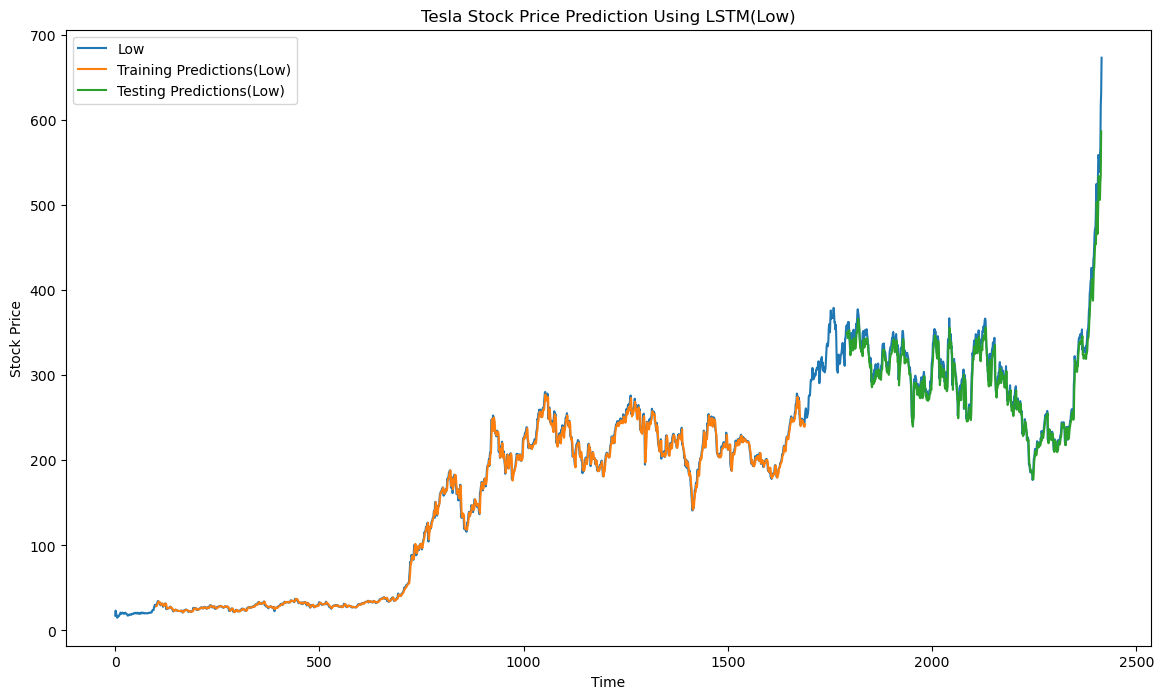

In [618]:
plt.figure(figsize=(14, 8))
plt.plot(scaler.inverse_transform(data_scaled), label='Low')
plt.plot(train_plot, label='Training Predictions(Low)')
plt.plot(test_plot, label='Testing Predictions(Low)')
plt.title('Tesla Stock Price Prediction Using LSTM(Low)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### LSTM Model for with High as a feature 

In [629]:
tesla_high = pd.read_csv("./Data/tesla_data.csv")
features_high= tesla_data[['High']].values

In [631]:
scaler_high = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(features_high)

In [632]:
def create_dataset(dataset, time_step=1):
    X_high, Y_high = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  
        X_high.append(a)
        Y_high.append(dataset[i + time_step, 0])  
    return np.array(X_high), np.array(Y_high)

In [634]:
training_size = int(len(data_scaled) * 0.7)
test_size = len(data_scaled) - training_size 
train_data, test_data = data_scaled[0:training_size, :], data_scaled[training_size:len(data_scaled), :]

In [636]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [638]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [640]:
model_high = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(100, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25), 
    tf.keras.layers.Dense(1)  
])

C:\Users\Chaitu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [644]:
model_high.compile(optimizer='adam', loss='mean_squared_error')
model_high.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)
train_predict_high = model_high.predict(X_train)
test_predict_high = model_high.predict(X_test)
train_predict_high = scaler.inverse_transform(train_predict_high)
test_predict_high = scaler.inverse_transform(test_predict_high)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 3.7104e-04 - val_loss: 2.5254e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 6.5324e-05 - val_loss: 2.9092e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 4.2078e-05 - val_loss: 2.9379e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 3.9275e-05 - val_loss: 2.6658e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 3.5419e-05 - val_loss: 2.9980e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 3.8105e-05 - val_loss: 3.6604e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 4.3770e-05 - val_loss: 3.1469e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 4.1511e-05 - val_loss: 3.6960e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 4.3012e-05 - val_loss: 2.6670e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 3.6067e-05 - val_loss: 3.5544e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - lo

In [648]:
train_rmse_high = math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict))
test_rmse_high = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), test_predict))
print(f"Training RMSE for high: {train_rmse:.9f}")
print(f"Testing RMSE for high: {test_rmse:.9f}")

Training RMSE for high: 167.355178844
Testing RMSE for high: 310.172460851


In [654]:
train_plot = np.empty_like(data_scaled)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict_high) + time_step, :] = train_predict_high
test_plot = np.empty_like(data_scaled)
test_plot[:, :] = np.nan
test_plot[len(train_predict_high) + (time_step * 2) + 1:len(data_scaled) - 1, :] = test_predict_high

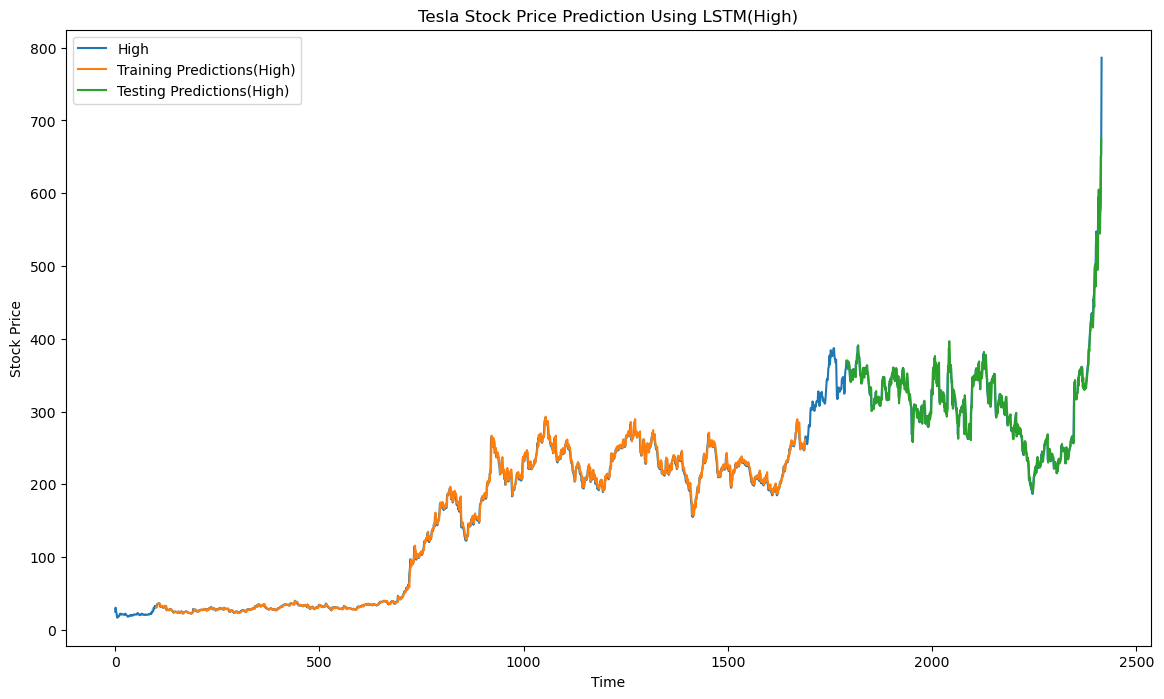

In [656]:
plt.figure(figsize=(14, 8))
plt.plot(scaler.inverse_transform(data_scaled), label='High')
plt.plot(train_plot, label='Training Predictions(High)')
plt.plot(test_plot, label='Testing Predictions(High)')
plt.title('Tesla Stock Price Prediction Using LSTM(High)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()